# Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from scipy.integrate import solve_ivp
from sklearn.cluster import KMeans

# Utils functions

In [8]:
def traj_gen(omega,T,dt,v0,w0):
    
	def rhs(t, y, omega):
			v, w = y
			dvdt = w
			dwdt = -omega**2 * v
			return [dvdt, dwdt]

	t_span = (0,T)
	t_eval = np.arange(0, T, dt)
	sol    = solve_ivp(rhs,t_span,[v0,w0],args=(omega,),method='BDF',t_eval=t_eval)

	t = sol.t
	v = sol.y[0]
	w = sol.y[1]

	return t,v,w

def plot_trajectory(trajectory,tt,percentage=0.5,plotline=0):
	plt.figure(figsize=(5, 3))
	plt.plot(tt,trajectory[:, 0], label='x(t)', color='c')
	plt.plot(tt,trajectory[:, 1], label='x\'(t)', color='y')
	if plotline:
		check_v = np.min(trajectory[:,0]) + percentage*(np.max(trajectory[:,0]) - np.min(trajectory[:,0]))
		check_w = np.min(trajectory[:,1]) + percentage*(np.max(trajectory[:,1]) - np.min(trajectory[:,1]))
		plt.hlines(y=check_v, xmin=tt[0], xmax=tt[-1], colors='c', linestyles='dashed', label='v threshold')
		plt.hlines(y=check_w, xmin=tt[0], xmax=tt[-1], colors='y', linestyles='dashed', label='w threshold')
	plt.xlabel('Time')
	plt.ylabel('Values (x, x\')')
	plt.title('x and x\' over time')
	plt.legend()
	plt.grid(True)
	plt.show()

def compare_solutions(trajectory,tt,omega):
	v0 = trajectory[0,0]
	w0 = trajectory[0,1]
	fig,axs = plt.subplots(1,2)
	axs[0].plot(tt,trajectory[:, 0], label='x(t)', color='c')
	axs[0].plot(tt,trajectory[:, 1], label='x\'(t)', color='y')
	axs[1].plot(tt,v0*np.cos(omega*tt) + w0/omega*np.sin(omega*tt), label='x(t)', color='c')
	axs[1].plot(tt,-v0*omega*np.sin(omega*tt) + w0*np.cos(omega*tt), label='x\'(t)', color='y')
	axs[0].set_xlabel('Time')
	axs[0].set_ylabel('Values (x, x\')')
	axs[0].legend()
	axs[0].grid(True)
	axs[1].set_xlabel('Time')
	axs[1].set_ylabel('Values (x, x\')')
	axs[1].legend()
	axs[1].grid(True)

# Trajectories examples

Omega =  0.2756363435729131
Omega =  0.19546078948237994
Omega =  0.16160171572062787
Omega =  0.4220769780385957
Omega =  0.14522346394818975
Omega =  0.21077047819779698
Omega =  0.023374112200507502
Omega =  0.4602605680380056
Omega =  0.4868819262601345
Omega =  0.39529657798441803
Omega =  0.1300269323098976
Omega =  0.429024309196468
Omega =  0.4829708279934115
Omega =  0.4462786838014207
Omega =  0.02651617056466543
Omega =  0.36686987904885654
Omega =  0.3873823773958659
Omega =  0.37173056299567925
Omega =  0.25400527972772574
Omega =  0.23348919737055002


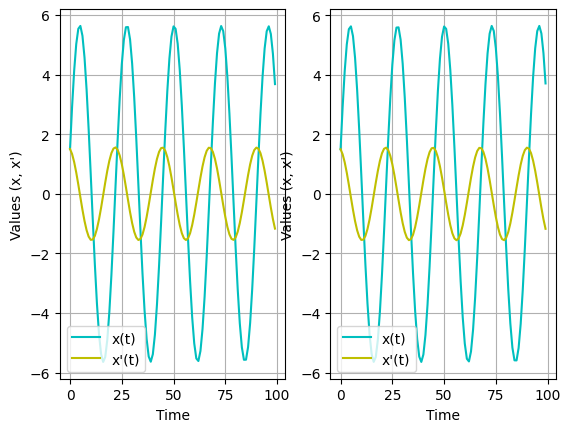

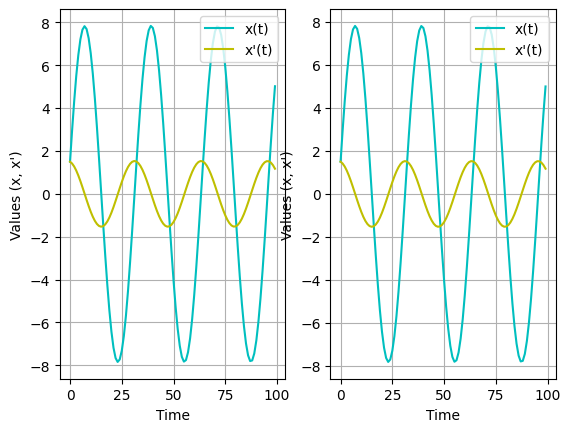

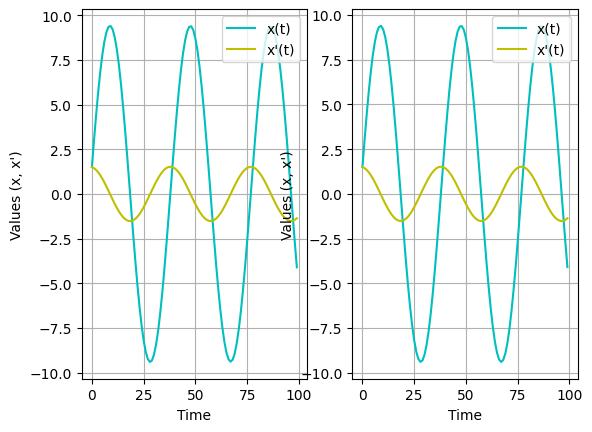

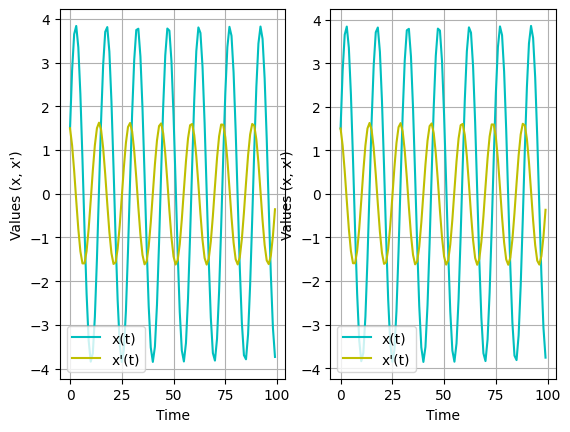

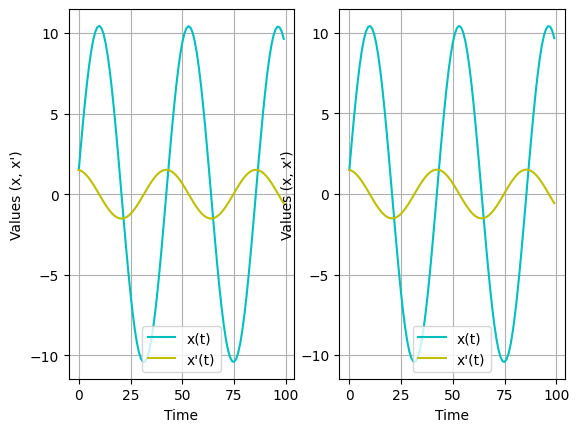

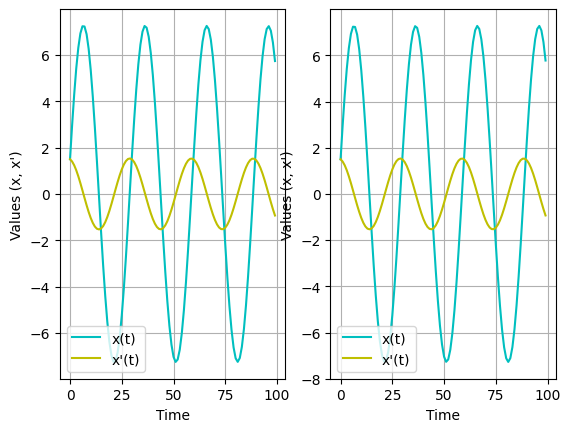

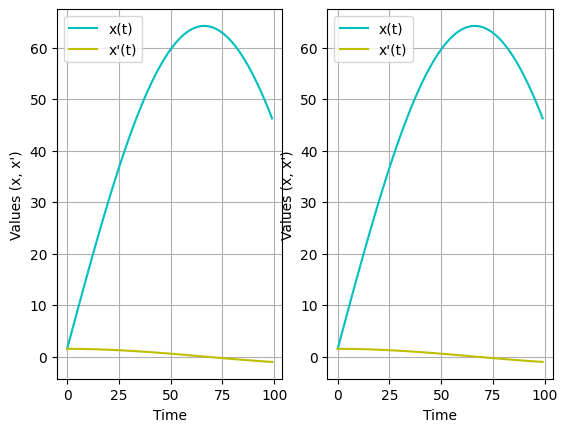

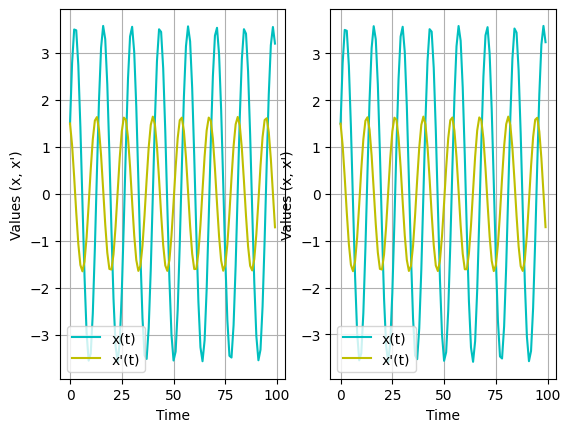

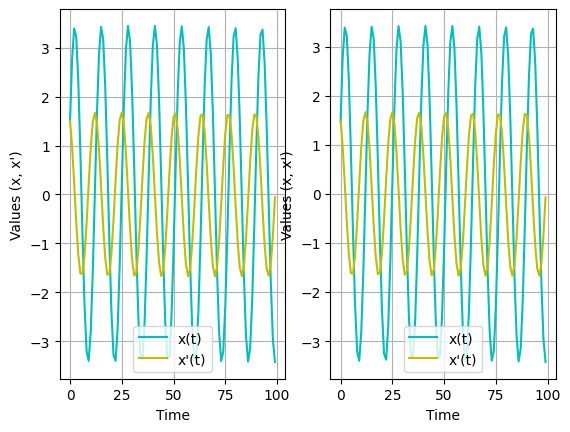

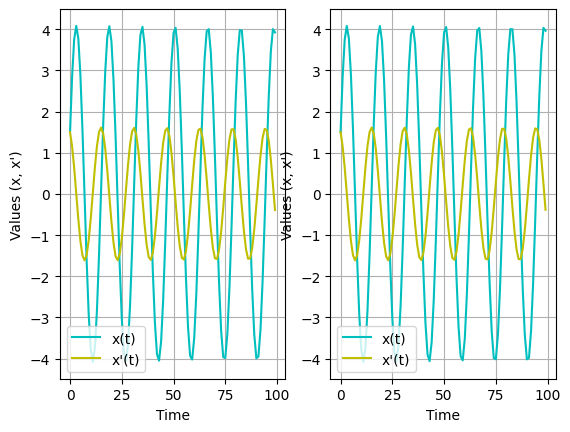

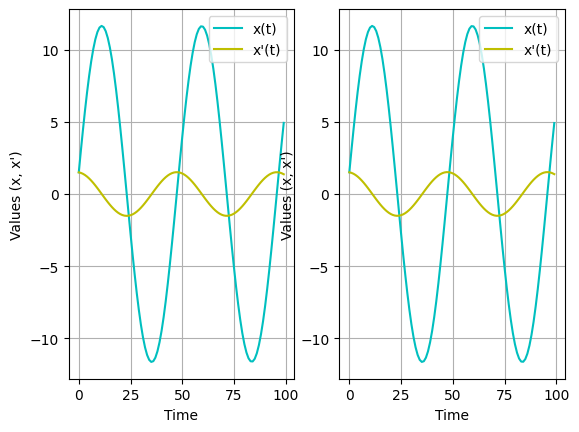

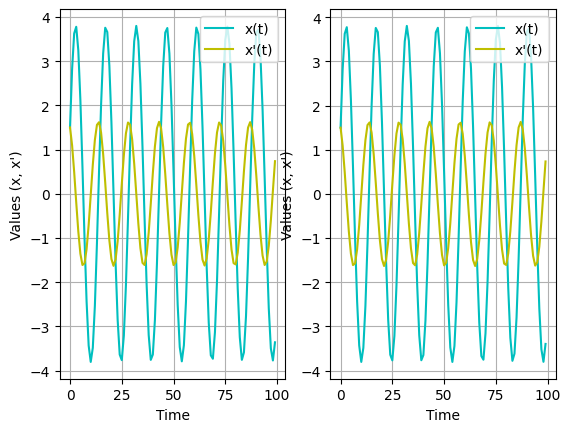

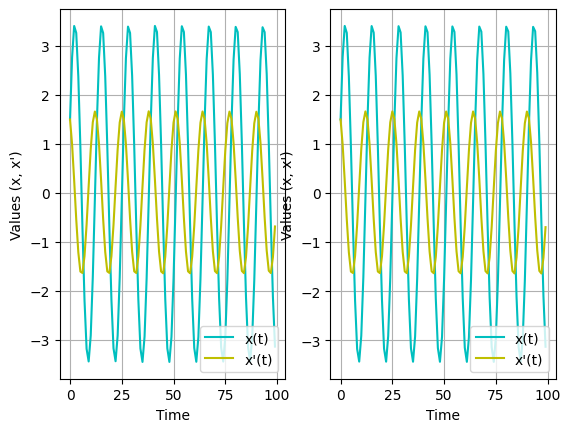

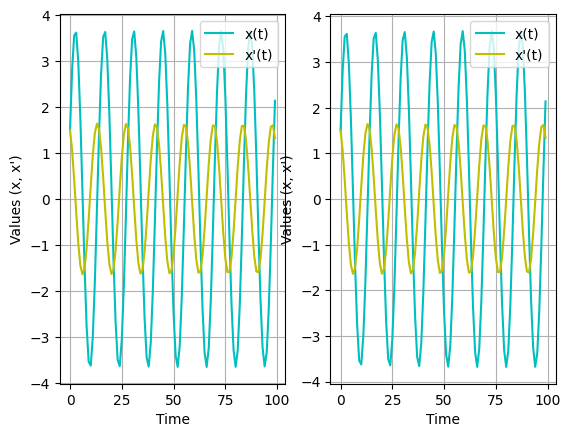

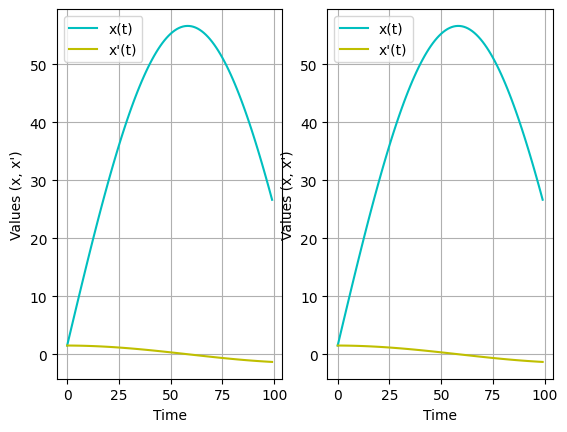

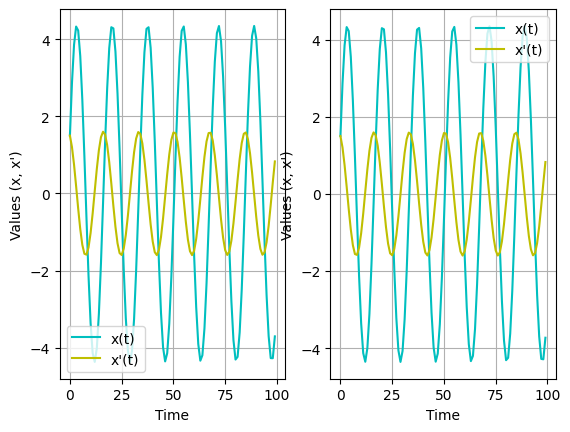

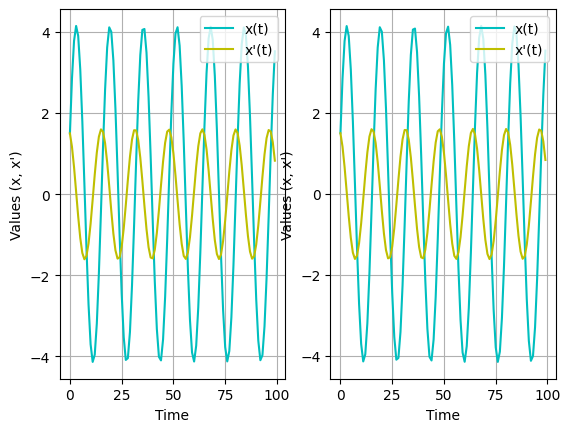

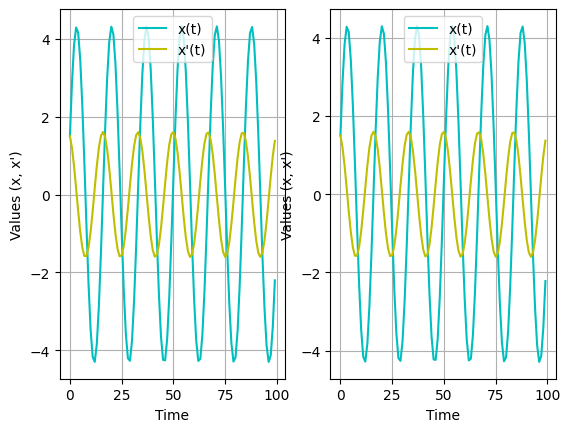

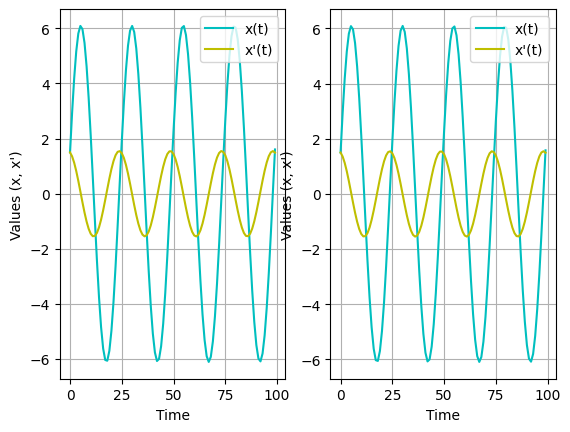

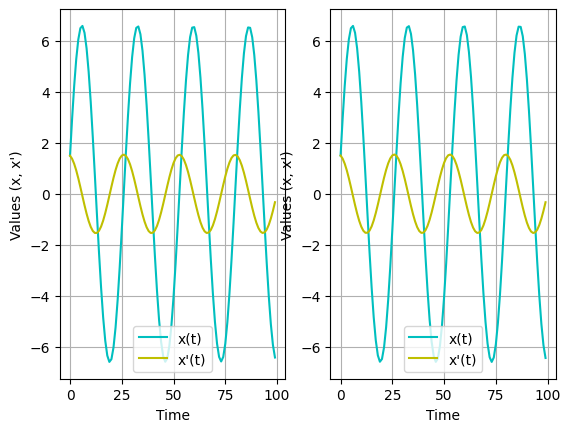

In [9]:
T     = 100
N     = 100
dt    = T/N
NT    = 20

v0      = 1.5
w0      = v0

trajectories = []

for i in range(NT):
	omega = np.random.uniform(0.0,0.5)

	print("Omega = ",omega)
	t,v,w = traj_gen(omega,T,dt,v0,w0)
	x_temp = np.hstack((v.reshape(-1,1),w.reshape(-1,1)))
	compare_solutions(x_temp,t,omega)
	trajectories.append(x_temp)

training_target = np.stack(trajectories, axis=0).astype(np.float64)